In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

C:\Users\leons\AppData\Local\Temp/ipykernel_4788/2359456227.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  predicted_sales = m * (1 - np.exp(-(p + q) * t)) / (1 + q / p * np.exp(-(p + q) * t))


Estimated parameters: m = 485.09, p = 0.0676, q = 0.7048


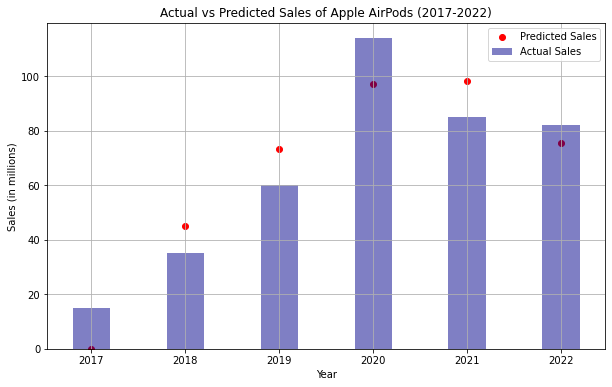

In [14]:
# Problem 4
# Apple AirPods from 2017 to 2022
years = np.array([2017, 2018, 2019, 2020, 2021, 2022])
# Unit sales in millions
sales = np.array([15, 35, 60, 114, 85, 82])
# Cumulative sales
cumulative_sales = np.cumsum(sales)

# Time period for the model
t = np.arange(len(years))

# Objective function
def bass_model_error(params):
    m, p, q = params
    predicted_sales = m * (1 - np.exp(-(p + q) * t)) / (1 + q / p * np.exp(-(p + q) * t))
    return np.sum((cumulative_sales - predicted_sales) ** 2)

# Initial parameter guesses: [m, p, q]
initial_params = [200, 0.03, 0.38]

# Bounds for the parameters
bounds = [(max(cumulative_sales), 1000), (0, 1), (0, 1)]

# Minimize the objective function using the 'L-BFGS-B' method
result = minimize(bass_model_error, initial_params, bounds=bounds, method='L-BFGS-B')

m_est, p_est, q_est = result.x

if result.success:
    print(f"Estimated parameters: m = {m_est:.2f}, p = {p_est:.4f}, q = {q_est:.4f}")
else:
    print("Optimization failed:", result.message)

if result.success:
    # Calculate predicted cumulative sales using the estimated parameters
    m_est, p_est, q_est = result.x
    predicted_cumulative_sales = m_est * (1 - np.exp(-(p_est + q_est) * t)) / (1 + q_est / p_est * np.exp(-(p_est + q_est) * t))
    
    # Calculate predicted annual sales from the predicted cumulative sales
    predicted_sales = np.diff(np.insert(predicted_cumulative_sales, 0, 0))
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(years, sales, label='Actual Sales', color='darkblue', width=0.4, align='center', alpha=0.5)
    plt.scatter(years, predicted_sales, color='red', label='Predicted Sales')
    
    plt.xlabel('Year')
    plt.ylabel('Sales (in millions)')
    plt.title('Actual vs Predicted Sales of Apple AirPods (2017-2022)')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Optimization failed:", result.message)



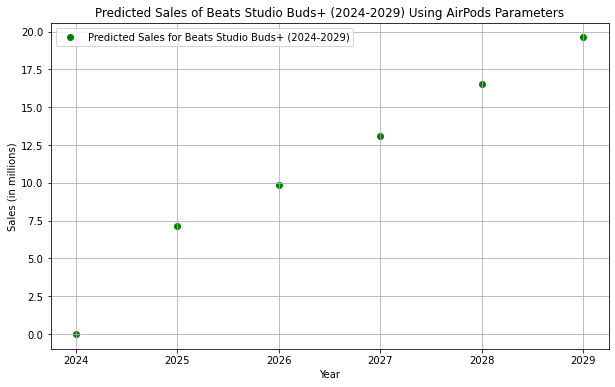

In [15]:
m_est, p_est, q_est = [200, 0.03, 0.38]

# (2024 to 2029)
future_years = np.arange(2024, 2030)
t_future = np.arange(len(future_years))

# Calculate predicted cumulative sales
predicted_cumulative_sales_buds_future = m_est * (1 - np.exp(-(p_est + q_est) * t_future)) / (1 + q_est / p_est * np.exp(-(p_est + q_est) * t_future))

# Calculate predicted annual sales for Beats Studio Buds+
predicted_sales_buds_future = np.diff(np.insert(predicted_cumulative_sales_buds_future, 0, 0))

plt.figure(figsize=(10, 6))
plt.scatter(future_years, predicted_sales_buds_future, color='green', label='Predicted Sales for Beats Studio Buds+ (2024-2029)')

plt.xlabel('Year')
plt.ylabel('Sales (in millions)')
plt.title('Predicted Sales of Beats Studio Buds+ (2024-2029) Using AirPods Parameters')
plt.legend()
plt.grid(True)
plt.show()
